                                                EDA 

<img src="Imagenes/logo.png" alt="Logo" style="width: 50px; height: auto;">

In [565]:
import pandas as pd
import os

Leemos los archivos

In [566]:
ruta_homicidios = os.path.join('Datasets', 'homicidios.xlsx')

Vamos a traer las dos tablas que estan dentro de homicidios.xlsx

In [567]:
# Hacemos los dataframes, con el parametro sheet_name traemos la hoja del archivo excel que queremos
df_homicidios_hechos = pd.read_excel(ruta_homicidios,sheet_name='HECHOS')
df_homicidios_victimas = pd.read_excel(ruta_homicidios, sheet_name='VICTIMAS')

Analizamos los datos de la tabla df_homicidios_hechos

In [568]:
df_homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [569]:
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [570]:
df_homicidios_hechos.tail()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6,PADRE CARLOS MUJICA 709,CALLE,...,709.0,NaN,PADRE CARLOS MUGICA 709,1,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO


In [571]:
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [572]:
df_homicidios_hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,3336.635659,7.425287
std,0.179393,1.683754,3.571309,8.639646,3060.641793,4.387050
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


Podemos analizar con .describe() lo siguiente:

El numero de victimas en promedio por cada accidente hay 1 victima fatal.
El maximo de victimas por un accidente es de 3 muertes.

Los datos abarcan desde el año 2016 hasta el 2021.

La comuna puede ser importante para entender la distribución geográfica de los accidentes.
Se puede ver que en comuna, el min que es el valor minimo de la columna, cuentan a 0 como una comuna pero en realidad debe ser un faltante, ya que en Buenos Aires hay 15 comunas numeradas del 1 al 15.

En el 25% de los datos de la columna comuna aparace la comuna 4, 

En el 50% de los datos de la columna comuna, aparece la comuna 8,

En el 75% de los datos de la columna comuna, aparece la comuna 11,

Mas cantidad de datos que aparece es la comuna 15.

Chequeamos duplicados

Chequeamos nulos

In [573]:
df_homicidios_hechos.duplicated().sum()

0

In [574]:
df_homicidios_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Estos son los nulos que muestra la base, pero tambien puede haber datos como en comuna, los cuales tiene algo el campo, pero no refiere a un dato, sino a un reemplazo del nulo, como el caso de la comuna que reemplazan los nulos con un 0.

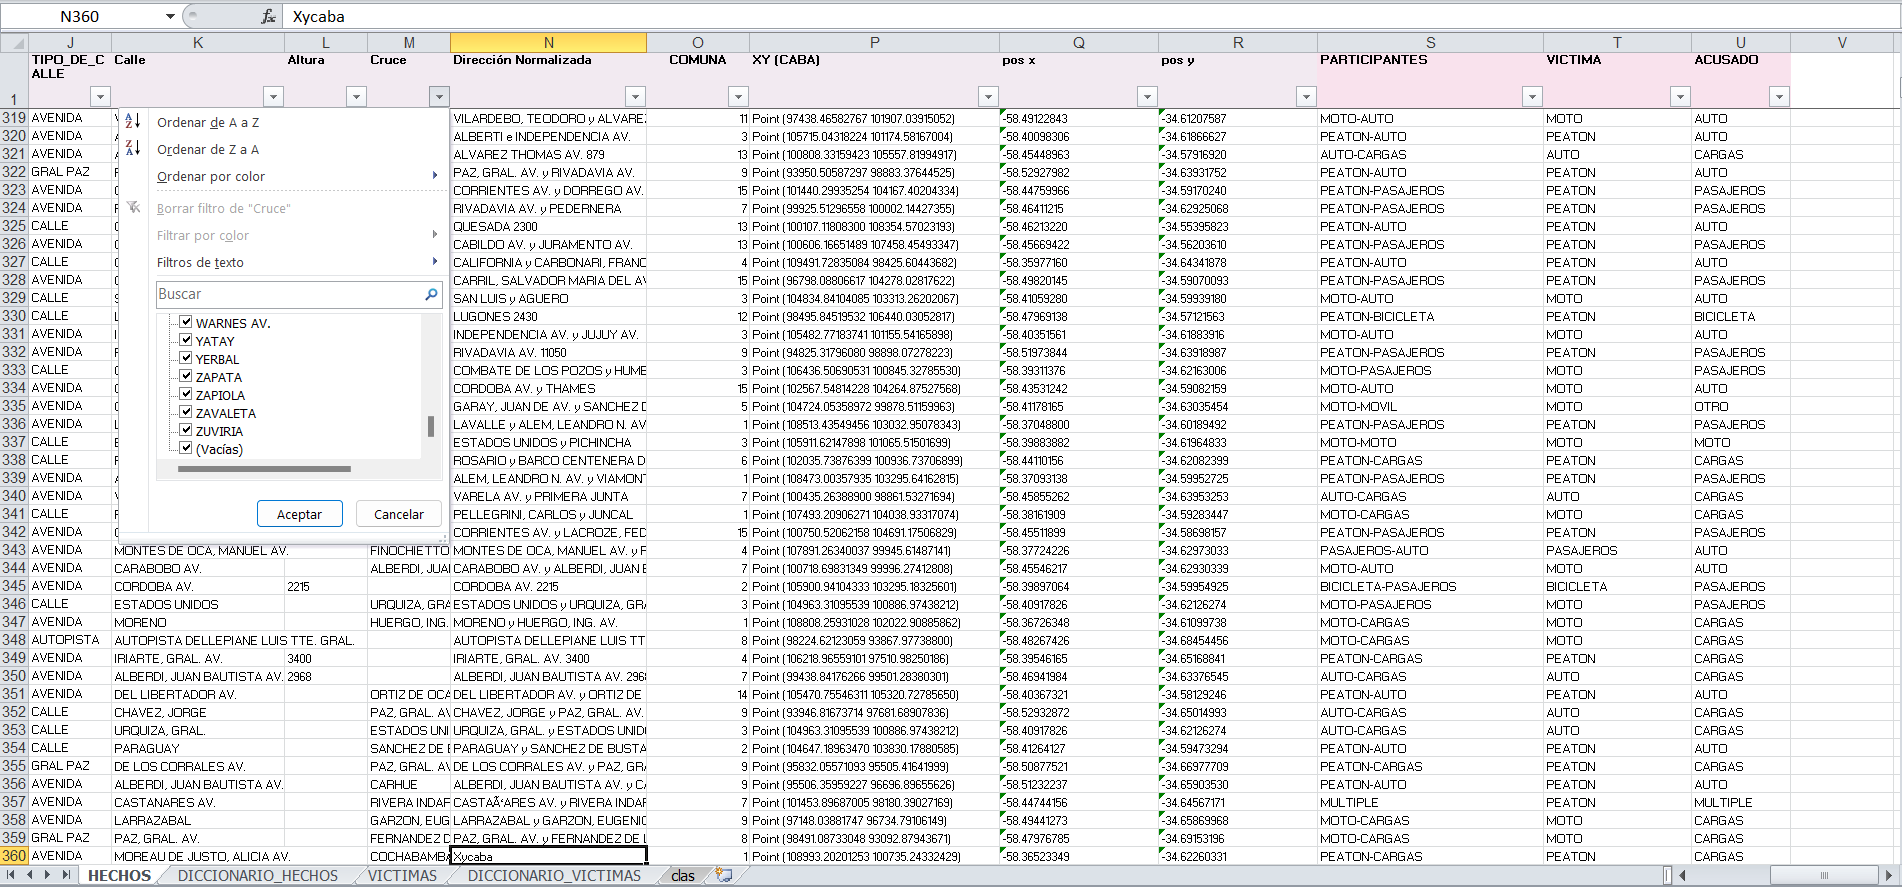

Observando el dataset chequeando en el excel en cada columna, podemos ver que las columnas id, n_victimas, fecha, AAAA, MM, lugar_del_hecho, DD, tipo_de_calle, no contienen nulos.

- En la columna hora y HH, tenemos datos nulos representados, como SD, lo cual nos trae un problema, por el tipo de dato de la columna, lo cual podemos chequear, y ver como lo reemplazamos.

- En la columna Calle como describimos anteriormente, tenemos un faltante, que esta como vacio.

- La columna de altura, tiene 567 faltantes, como vacios.

- La columna de cruce, tenemos 171 faltantes, como vacios.

- La columna direccion normalizada tiene 8 faltantes, como vacios.

- La columna de comuna tiene 0 donde hay faltantes.

- XYCABA tiene faltantes representados, como point .. los faltantes

- posy y posx tienen un . donde hay faltantes

- participantes tiene SD-SD como los faltantes.

- Victima y acusado tienen SD como sus faltantes.

Vamos a analizar cada caso para tomar desiciones respecto a los faltantes

Columnas HH y HORAS

In [575]:
# Creamos una mascara para ver cuantos y cuales valores faltantes tenemos.
mask = df_homicidios_hechos['HH']=='SD'
df_homicidios_hechos[mask]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Para tratar este faltante vamos a utilizar la media de las horas, para colocar el valor que falta

In [576]:
# Para tratar este dato faltante primero vamos a reemplazar el valor con nulos
df_homicidios_hechos['HH'] = pd.to_numeric(df_homicidios_hechos['HH'], errors='coerce')
# Como es solo un dato, tome la desicion de poner la media de las horas, para completar este faltante
# Utilizamos round() para redondear la media, y dar un valor int
media_horas = int(round(df_homicidios_hechos['HH'].mean()))
# Vamos a reempazar el valor
df_homicidios_hechos.at[518, 'HH'] = media_horas
# Chequeamos como quedo
df_homicidios_hechos['HH'][518]

12.0

In [577]:
# como nos cambio el tipo de dato de int a float, vamos a volver a cambiar el dato por int
df_homicidios_hechos['HH'] = df_homicidios_hechos['HH'].astype(int)

In [578]:
# reeemplazamos ahora en HORAS con la media
# Asigna el valor constante '12:00:00' a la fila 518
df_homicidios_hechos.at[518, 'HORA'] = pd.to_datetime('12:00:00').time()

In [579]:
# Chequeamos como quedaron los cambios
fila_518 = df_homicidios_hechos.iloc[518]
fila_518

ID                                                    2019-0103
N_VICTIMAS                                                    1
FECHA                                       2019-12-18 00:00:00
AAAA                                                       2019
MM                                                           12
DD                                                           18
HORA                                                   12:00:00
HH                                                           12
LUGAR_DEL_HECHO                         PAZ, GRAL. AV. Y GRIVEO
TIPO_DE_CALLE                                          GRAL PAZ
Calle                                            PAZ, GRAL. AV.
Altura                                                      NaN
Cruce                                                    GRIVEO
Dirección Normalizada                   PAZ, GRAL. AV. y GRIVEO
COMUNA                                                       11
XY (CABA)                Point (94643.11

Columna Calle

In [580]:
# Verificamos el valor faltante
mask =df_homicidios_hechos['Calle'].isnull()
df_homicidios_hechos[mask]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Como vemos en esta fila, los faltantes que tiene, y viendo que no podemos saber ni su comuna, o lugar de hecho, ni sus coordenas o el acusado, tome la descion de borrar esta fila, ya que es una sola y tiene muchos datos importantes que estan faltantes

In [581]:
# Eliminamos la fila
# Utilizamos el método drop para eliminar la fila 19
df_homicidios_hechos = df_homicidios_hechos.drop(119)

# Vamos a reiniciar el index
df_homicidios_hechos.reset_index(drop=True, inplace=True)

Columna altura

- La columna de altura, tiene 567 faltantes, como vacios. Analizando en profundida el dataset, se puede ver que hay tantos faltantes, ya que en muchos de los casos de accidentes viales, fueron en una interseccion de calles, en una esquina, por ende la altura no es relevante, sino el cruce de las calles. Tambien podemos ver que estos datos tambien estan representados en la columna LUGAR_DEL_HECHO donde dentro tiene la direccion con la calle y la numeracion donde ocurrio el accidente.

Por el momento vamos a mantenerlo asi, y tomare una decision de si es redundante o es util esta columna, cuando nos llevemos los datos para Power BI para hacer el analisis.

Columna Cruce

- La columna de cruce, tenemos 171 faltantes, como vacios. los faltantes pueden venir de que los accidentes fueron en una autopista o que no fueron en un cruce, sino en alguna parte de la cuadra.
Por el momento los vamos a dejar asi, y vamos a analizar mas adelante como tratar esto y si las columna es util para el analisis posterior

Columna Direccion

- La columna direccion normalizada tiene 7 faltantes, como vacios.

In [582]:
df_homicidios_hechos['Dirección Normalizada'].isnull().sum()

7

In [583]:
# Vamos a filtrar los resultados para mostrarlos
registros_nulos = df_homicidios_hechos[df_homicidios_hechos['Dirección Normalizada'].isnull()]
# Muestra el DataFrame
registros_nulos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
179,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
312,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
545,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
620,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


Podemos ver que los faltantes en la columna Dirección Normalizada se debe a que el accidente fue producido en una autopista, donde los valores que tenemos es la autopista y el kilometro donde sucesido el incidente, por ende lo vamos a dejar como esta

Columna Comuna

- La columna de comuna tiene 0 donde hay faltantes.

In [584]:
# Buscamos los valores en donde comuna tiene 0
# Vamos a filtrar los resultados para mostrarlos
registros_nulos = df_homicidios_hechos[df_homicidios_hechos['COMUNA']== 0 ]
# Muestra el DataFrame
registros_nulos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
138,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


In [585]:
# Eliminamos la fila
# Utilizamos el método drop para eliminar la fila 19
df_homicidios_hechos = df_homicidios_hechos.drop(138)

# Vamos a reiniciar el index
df_homicidios_hechos.reset_index(drop=True, inplace=True)

Por lo que podemos ver, hay informacion importante que esta faltante en esta unica fila, asi que procedemos a borrarla ya que no tenemos los datos suficientes para hacer el analisis posterior

Columna XY(CABA)

- XY(CABA) tiene faltantes representados, con tipo de dato point donde los faltantes esta representados con '..'

En este caso, la columna de XY(CABA) estan las coordenadas para graficar en un mapa, con el tipo point de datos, pero tenemos los campos 'posy' y 'posx' los cuales traen la latitud y longitud para poder graficar en mapas, asi que lo vamos a dejar asi para el posterior analisis cuando tenga que utilizar power bi

Columnas 'posy', 'posx'

- posy y posx tienen un . donde hay faltantes

In [586]:
# Vamos a ver los faltantes para estas columnas
# Filtra el DataFrame para mostrar solo las filas con valores '.' en 'pos y' o 'pos x'
registros_nulos_pos = df_homicidios_hechos[(df_homicidios_hechos['pos x'] == '.') | (df_homicidios_hechos['pos y'] == '.')]

# Muestra el DataFrame filtrado
print(registros_nulos_pos[['ID','LUGAR_DEL_HECHO', 'pos x', 'pos y']])


            ID                          LUGAR_DEL_HECHO pos x pos y
38   2016-0052               AUTOPISTA LUGONES PK 10000     .     .
106  2016-0136         AU BUENOS AIRES - LA PLATA KM. 4     .     .
174  2017-0042            AV. LEOPOLDO LUGONES PKM 6900     .     .
178  2017-0050  AU PERITO MORENO Y RAMAL ENLACE AU1/AU6     .     .
179  2017-0051                       AU DELLEPIANE 2400     .     .
254  2017-0140              AU ARTURO FRONDIZI PKM 3100     .     .
311  2018-0039                 AUTOPISTA LUGONES KM 4.7     .     .
544  2020-0026             LUGONES, LEOPOLDO AV. KM 6,1     .     .
557  2020-0039                          MURGUIONDO 2700     .     .
619  2021-0023         AU BUENOS AIRES LA PLATA  KM 4,5     .     .


Las faltantes solo representan una porcion menor por lo que considero dejarlas.

Columna Participantes, victima y acusado

- participantes tiene SD-SD como los faltantes.

- Victima y acusado tienen SD como sus faltantes.

In [587]:
# Filtrar las filas donde la columna "Participantes" es "SD" o "SD-SD"
conteo_participantes = df_homicidios_hechos[df_homicidios_hechos['PARTICIPANTES'].isin(['SD', 'SD-SD'])]['PARTICIPANTES'].value_counts()

# Filtrar las filas donde la columna "VICTIMA" es "SD"
conteo_victima = df_homicidios_hechos[df_homicidios_hechos['VICTIMA'] == 'SD']['VICTIMA'].value_counts()

# Filtrar las filas donde la columna "ACUSADO" es "SD"
conteo_acusado = df_homicidios_hechos[df_homicidios_hechos['ACUSADO'] == 'SD']['ACUSADO'].value_counts()

# Imprimir los resultados
print("Conteo de Participantes (SD y SD-SD):")
print(conteo_participantes)

print("\nConteo de Víctima (SD):")
print(conteo_victima)

print("\nConteo de Acusado (SD):")
print(conteo_acusado)

Conteo de Participantes (SD y SD-SD):
SD-SD    4
Name: PARTICIPANTES, dtype: int64

Conteo de Víctima (SD):
SD    8
Name: VICTIMA, dtype: int64

Conteo de Acusado (SD):
SD    21
Name: ACUSADO, dtype: int64


En este caso, los faltantes son pocos datos como se menciona arriba, estos faltantes puede deberse a varios factores, por ende no los vamos a borrar, y vamos a trabajar con estos datos en power BI, entendiendo que hay valores de victima, acusado y participantes, que estan como sin dato (SD)

Vamos a ver como quedo el datrame con las transformaciones realizadas

In [588]:
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     694 non-null    object        
 1   N_VICTIMAS             694 non-null    int64         
 2   FECHA                  694 non-null    datetime64[ns]
 3   AAAA                   694 non-null    int64         
 4   MM                     694 non-null    int64         
 5   DD                     694 non-null    int64         
 6   HORA                   694 non-null    object        
 7   HH                     694 non-null    int32         
 8   LUGAR_DEL_HECHO        694 non-null    object        
 9   TIPO_DE_CALLE          694 non-null    object        
 10  Calle                  694 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Vamos a exportar el dataset transformado, para su uso en power BI

In [589]:
# Definimos la ruta relativa
ruta_relativa = os.path.join('Datasets_Limpios', 'homicidios_hechos.csv')

# Guardamos el DataFrame en un archivo CSV con la ruta relativa
df_homicidios_hechos.to_csv(ruta_relativa, index=False)

Para normalizacion de nombres y cambio de tipo de datos de las columnas lo haremos con la herramienta editor de power query, en power bi

Vamos a ver el dataframe df_homicidio_victimas

In [590]:
df_homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [591]:
df_homicidios_victimas.tail()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
716,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


In [592]:
df_homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [593]:
df_homicidios_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [594]:
df_homicidios_victimas.duplicated().sum()

0

In [595]:
df_homicidios_victimas.describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


Al analizar este dataset, se ve que es complementario al df_homicidios_Hechos, teniendo informacion de la edad, sexo y fecha de fallecimiento de las victimas.

Estan conectados por el campo ID

Para normalizacion de nombres y cambio de tipo de datos de las columnas lo haremos con la herramienta editor de power query, en power bi

Vamos a guardar el dataset en un csv para luego su uso en power bi

In [596]:
# Definimos la ruta relativa
ruta_relativa = os.path.join('Datasets_Limpios', 'homicidios_victimas.csv')

# Guardamos el DataFrame en un archivo CSV con la ruta relativa
df_homicidios_victimas.to_csv(ruta_relativa, index=False)

Ya tenemos los datos Transformados y limpios, ahora vamos a analizar las columnas que tenemos en los datasets y buscar metricas y valores outliers para analizarlos.

Contexto del Conjunto de Datos:

Secretaría de Transporte - Subsecretaría de Planificación de la Movilidad - Observatorio de Movilidad y Seguridad Vial

Información sobre Homicidios en siniestros viales ocurridos en la Ciudad. Los datos incluyen fecha y ubicación del hecho y tipo de transporte involucrado. Además se especifica el género y edad de las víctimas y el tipo de lesión sufrida.

Resumen Estadístico:

Incluye un resumen estadístico básico de las columnas numéricas y categóricas relevantes. Esto incluye medidas como la media, la mediana, la desviación estándar, etc.

In [597]:
df_homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [599]:
df_homicidios_hechos['N_VICTIMAS'].describe()

count    694.000000
mean       1.030259
std        0.179644
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

In [600]:
df_homicidios_hechos['FECHA'].describe()

C:\Users\frank\AppData\Local\Temp\ipykernel_31804\3236069617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_homicidios_hechos['FECHA'].describe()


count                     694
unique                    598
top       2017-01-16 00:00:00
freq                        3
first     2016-01-01 00:00:00
last      2021-12-30 00:00:00
Name: FECHA, dtype: object

In [601]:
df_homicidios_hechos['HH'].describe()

count    694.000000
mean      11.662824
std        6.682784
min        0.000000
25%        6.000000
50%       11.000000
75%       17.000000
max       23.000000
Name: HH, dtype: float64

In [602]:
df_homicidios_hechos['COMUNA'].describe()

count    694.000000
mean       7.446686
std        4.375177
min        1.000000
25%        4.000000
50%        8.000000
75%       11.000000
max       15.000000
Name: COMUNA, dtype: float64

In [598]:
df_homicidios_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

Visualización de Datos:

    Crea gráficos para visualizar la distribución de tus datos. Algunas visualizaciones útiles pueden ser:
        Histogramas para variables numéricas.
        Gráficos de barras para variables categóricas.
        Box plots para detectar posibles valores atípicos.
        Gráficos de dispersión para analizar relaciones entre variables numéricas.

Correlaciones y Relaciones:

    Analiza las correlaciones entre variables numéricas utilizando mapas de calor o gráficos de dispersión. También puedes explorar relaciones específicas que puedan ser relevantes para tu análisis.

Análisis de Tendencias Temporales:

    Si tu conjunto de datos incluye información temporal, crea gráficos de series temporales para identificar patrones o tendencias a lo largo del tiempo.

Exploración de Variables Categóricas:

    Para las variables categóricas, analiza las frecuencias y crea gráficos de barras para visualizar la distribución de categorías.

Análisis de Outliers:

    Identifica y documenta posibles valores atípicos en tus datos utilizando técnicas como box plots o métodos estadísticos.

Conclusiones Preliminares:

    Resume las observaciones clave que has realizado hasta ahora. ¿Hay patrones interesantes, relaciones fuertes o tendencias notables?


Anexos:

    Incluye gráficos adicionales, tablas de resumen detalladas o cualquier otro material adicional que pueda ser relevante.

--------------------------------------------------------

Vamos a trabajar el dataset de lesiones

In [478]:
ruta_lesiones = os.path.join('Datasets', 'lesiones.xlsx')